In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =  10,6

In [26]:
dataset = pd.read_csv('AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [7]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


C:\ProgramData\anacondaa\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


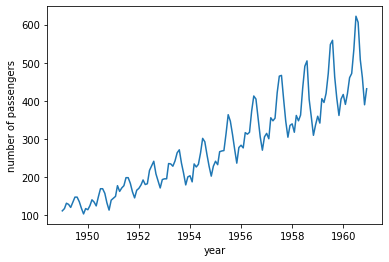

In [8]:
#plotting the sample graph
plt.xlabel('year')
plt.ylabel('number of passengers')
plt.plot(indexedDataset)

In [21]:
#since the above values are not stationery , find it ut using the two methods available in TS model
#(ie) rolling statistics and ADCF TEST
#rolling statistics
#window - 12 (months)-monthly analysis 
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


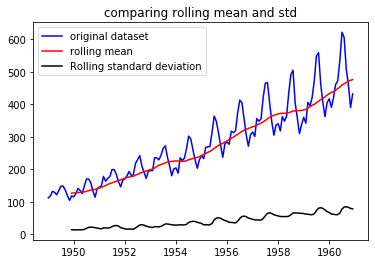

In [22]:
orig = plt.plot(indexedDataset , color="blue" , label="original dataset")
mean = plt.plot(rolmean , color="red" , label="rolling mean")
std = plt.plot(rolstd , color="black" , label="Rolling standard deviation")
plt.legend(loc="best")
plt.title("comparing rolling mean and std")
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
print("analysis using dickey-fuller test")
dftest = adfuller(indexedDataset['#Passengers'],autolag='AIC')
#this AIC is used to determine the exact need as op .. here the list of passengers
#values dissplayed as output
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','q-val','Number of observations'])
for key,value in dftest[4].items():
    dfoutput['critical value'] = value
print(dfoutput)

analysis using dickey-fuller test
Test statistic              0.815369
p-value                     0.991880
q-val                      13.000000
Number of observations    130.000000
critical value             -2.578770
dtype: float64


            #Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]


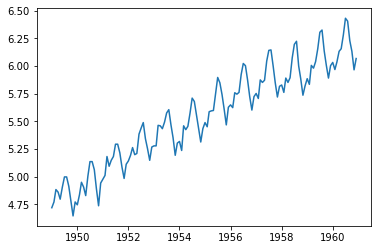

In [12]:
#the value of p must be less .. so determine the trend
#so take log , thus y-axis alone changes ..trend remains the same though
indexedlog = np.log(indexedDataset)
print(indexedlog)
plt.plot(indexedlog)

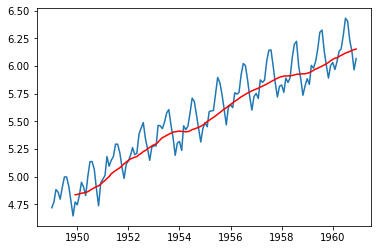

In [13]:
#now use moving average and calculate mean and standard deviation
movingAverage = indexedlog.rolling(window=12).mean()
movingSTD = indexedlog.rolling(window=12).std()
plt.plot(indexedlog)
plt.plot(movingAverage,color="red")


In [14]:
#difference between log value and moving avg 
datasetScale = indexedlog - movingAverage
datasetScale.head(10)

#remove NaN values
datasetScale.dropna(inplace=True)
datasetScale.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [15]:
#provide the values in a function and make it stationary .. there must be no trend 
# so analysis is easy
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries , color="blue" , label="original dataset")
    mean = plt.plot(movingAverage , color="red" , label="rolling mean")
    std = plt.plot(movingSTD , color="black" , label="Rolling standard deviation")
    plt.legend(loc="best")
    plt.title("comparing rolling mean and std")
    plt.show()
    
    #dickey-fuller test
    print("analysis using dickey-fuller test")
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    #this AIC is used to determine the exact need as op .. here the list of passengers
    #values dissplayed as output
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','q-val','Number of observations'])
    for key,value in dftest[4].items():
        dfoutput['critical value'] = value
    print(dfoutput)

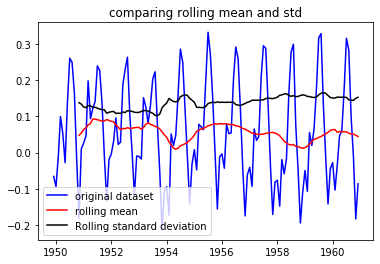

analysis using dickey-fuller test
Test statistic             -3.162908
p-value                     0.022235
q-val                      13.000000
Number of observations    119.000000
critical value             -2.579896
dtype: float64


In [16]:
#function call
test_stationary(datasetScale)

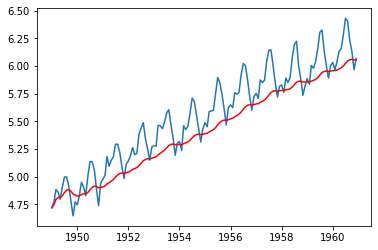

In [17]:
# p- value is less - so good to go
expWeightedAverage = indexedlog.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedlog)
plt.plot(expWeightedAverage, color="red")

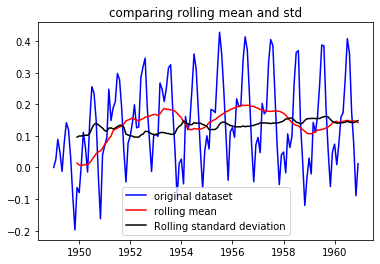

analysis using dickey-fuller test
Test statistic             -3.601262
p-value                     0.005737
q-val                      13.000000
Number of observations    130.000000
critical value             -2.578770
dtype: float64


In [18]:
#anothr type of analysis to determine which is better
datasetExpNew = indexedlog - expWeightedAverage
test_stationary(datasetExpNew)

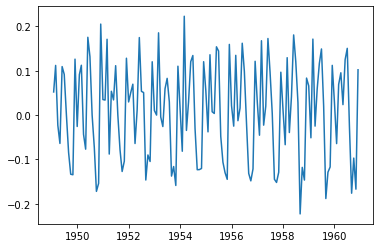

In [19]:
#shift the values by 1 - so finallly dataset become stationary
datasetShift = indexedlog - indexedlog.shift()
plt.plot(datasetShift)

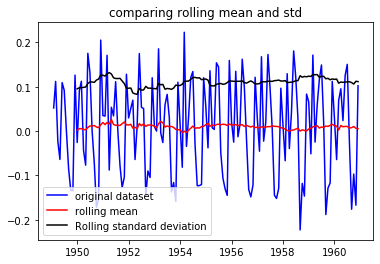

analysis using dickey-fuller test
Test statistic             -2.717131
p-value                     0.071121
q-val                      14.000000
Number of observations    128.000000
critical value             -2.578960
dtype: float64


In [20]:
datasetShift.dropna(inplace=True)
test_stationary(datasetShift)

#now the model - (ie) mean , std , becomes stationery

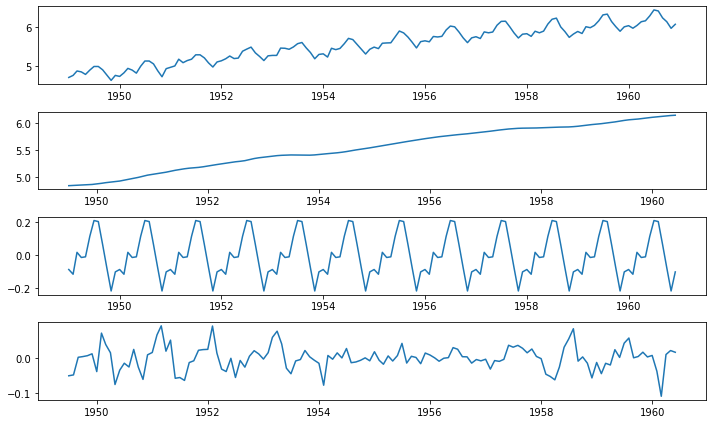

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedlog)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedlog, label="original_graph")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.subplot(413)
plt.plot(seasonal , label="seasonal")
plt.subplot(414)
plt.plot(residual , label="residuals")
plt.tight_layout()


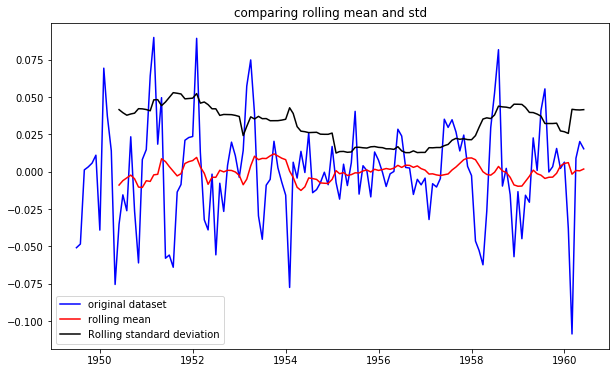

analysis using dickey-fuller test
Test statistic           -6.332387e+00
p-value                   2.885059e-08
q-val                     9.000000e+00
Number of observations    1.220000e+02
critical value           -2.579569e+00
dtype: float64


In [45]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationary(decomposedLogData)

Text(0.5, 1.0, 'PARTIAL AUTOCORRELATION FUNCTION')

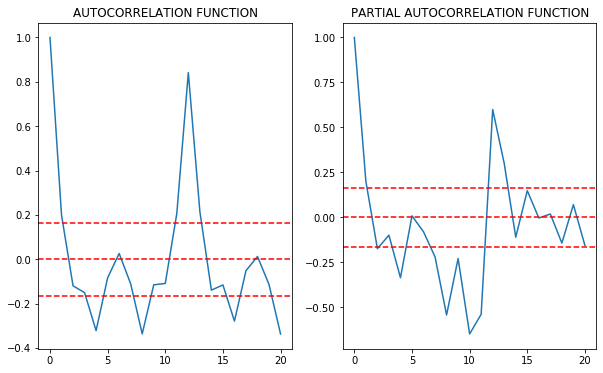

In [50]:
#To build ARIMA MODEL , we must know AR - auto regressive and MA- moving average 
#plot ACF AND PACF graph
from statsmodels.tsa.stattools import acf , pacf

lag_acf = acf(datasetShift, nlags=20)
lag_pacf = pacf(datasetShift , nlags=20 , method="ols")

#ACF PLOTTING
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="red")
plt.axhline(y=-1.96/np.sqrt(len(datasetShift)),linestyle='--',color="red")
plt.axhline(y=1.96/np.sqrt(len(datasetShift)),linestyle='--',color="red")
plt.title('AUTOCORRELATION FUNCTION')

#plot PACF 
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="red")
plt.axhline(y=-1.96/np.sqrt(len(datasetShift)),linestyle='--',color="red")
plt.axhline(y=1.96/np.sqrt(len(datasetShift)),linestyle='--',color="red")
plt.title('PARTIAL AUTOCORRELATION FUNCTION')

C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR MODEL


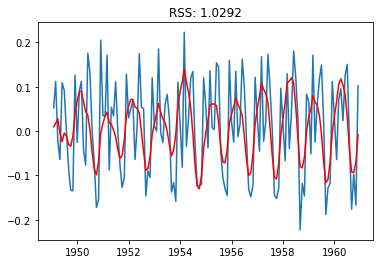

In [24]:
#building the ARIMA MODEL

from statsmodels.tsa.arima_model import ARIMA
#AR MODEL

#order syntax = (p,d,q)
# p->point where graph drops to zero
# d -> number of times diffrentiated
# RSS - better to be low
model = ARIMA(indexedlog , order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetShift)
plt.plot(results_AR.fittedvalues , color="red")
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetShift["#Passengers"])**2))
print("AR MODEL")

C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


MA MODEL


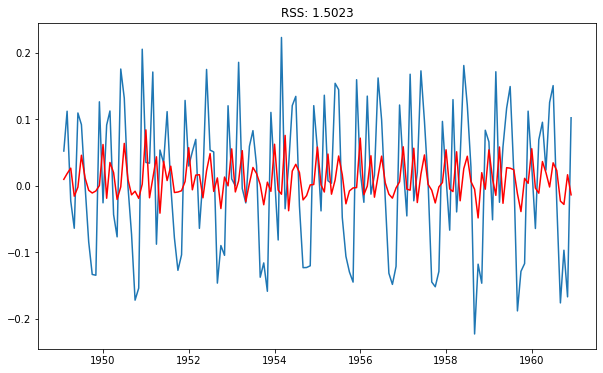

In [55]:
#building MA MODEL

#order syntax = (p,d,q)
# p->point where graph drops to zero
# d -> number of times diffrentiated
# RSS - better to be low
model = ARIMA(indexedlog , order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetShift)
plt.plot(results_MA.fittedvalues , color="red")
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetShift["#Passengers"])**2))
print("MA MODEL")

#RSS VALUE AGN - AROUND 1.5

C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\anacondaa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA MODEL


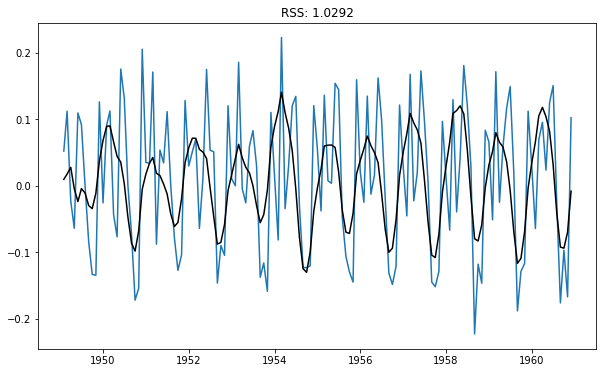

In [57]:
model = ARIMA(indexedlog , order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetShift)
plt.plot(results_ARIMA.fittedvalues , color="black")
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetShift["#Passengers"])**2))
print("ARIMA MODEL")

In [63]:
# obtain the final series and fit it as a model
# do possible changes fr better accuracy

# 3 steps - take cumulative sum , predict  , take exponent
predict_ARIMA = pd.Series(results_ARIMA.fittedvalues , copy = True)
print(predict_ARIMA.head(5))

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [61]:
# summing up - cumulative sum up
predict_ARIMA_sum = predict_ARIMA.cumsum()
print(predict_ARIMA_sum.head(5))

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [64]:
#ttaking log vals 
predict_ARIMA_log = pd.Series(indexedlog["#Passengers"].ix[0] , index=indexedlog.index)
predict_ARIMA_log = predict_ARIMA_log.add(predict_ARIMA_sum , fill_value=0)
predict_ARIMA_log.head(5)

C:\ProgramData\anacondaa\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

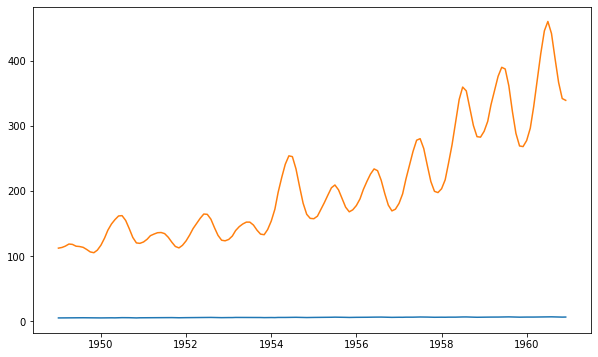

In [66]:
predict_ARIMA = np.exp(predict_ARIMA_log)
plt.plot(indexedlog)
plt.plot(predict_ARIMA)

In [67]:
indexedlog

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


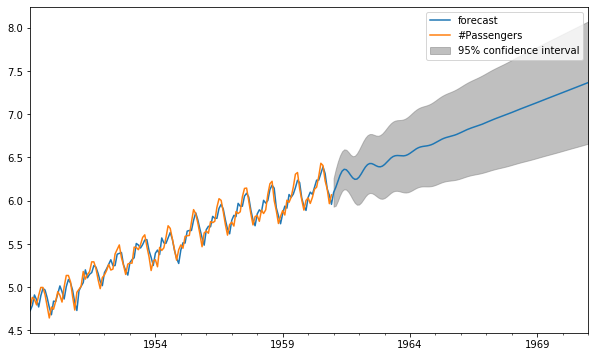

In [69]:
# next 10 yr predictions 
# 12 months * 10 yrs = 120
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [70]:
results_ARIMA.forecast(steps=120)

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91